<a href="https://colab.research.google.com/github/merriekay/CS66_F24/blob/main/Day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Big-O Notation
## Day10

### CS66: Introduction to Computer Science II | Fall 2024

Thursday, September 26th, 2024

### Helpful Resources:
[📜 Syllabus](https://docs.google.com/document/d/1lnkmnAm0tfw2ybqhS01ylSqKfkOcAAkmrrZUuDjwHuU/edit?usp=drive_link) | [📬 CodePost Login](https://codepost.io/login) | [📆 Schedule](https://docs.google.com/spreadsheets/d/1FW9s8S04zqpOaA13JyrlNPszk5D-H9dBi7xX6o5VpgY/edit?usp=drive_link) | [🙋‍♂️ PollEverywhere](https://pollev.com/moore) | [🪴 Office Hour Sign-Up](https://calendly.com/meredith-moore/office-hours)

# Announcements:

### Exam #1: Whoops
- Will be released today at 12:15 pm
- __Due__: Friday, October 4th, 2024 by 11:59 pm

### Assignment #5
- __Due__ tonight by 11:59 pm: https://analytics.drake.edu/~moore/CS66-F24/Assignment5.html

## References for this lecture

Problem Solving with Algorithms and Data Structures using Python

Sections 3.1-3.4: [https://runestone.academy/ns/books/published/pythonds/AlgorithmAnalysis/toctree.html](https://runestone.academy/ns/books/published/pythonds/AlgorithmAnalysis/toctree.html)

## VSCode debugging demo

Now we'll look at some debugging features of VSCode, picking up where we left off on Thursday.



## Group Activity Problem 4 - we don't even know what this is but we'll get it working

Copy the following code into a python file, then use information given to you by the stack trace to make this code run.
You don't have to make it pretty, and you don't even need to know exactly what everything does. The goal here is to understand where errors might be coming from, what the errors mean, and how to make them go away. Your chances of understanding what's going on in someone else's code are far better when you can actually see some output.

Hint: solve_ivp is a real method - it's inside scipy.integrate. How would you have found this out without this hint?
- you may need to install some modules, this is often part of the debugging process and we should get comfy intalling Python modules.

In [ ]:
#Lotka-Volterra predator-prey model
import numpy as np
import scipy.integrate as intg
import matplotlib.pyplot as plt

def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

sol = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1), dense_output=True)

t = np.linspace(0, 15, 300)
z = sol.sol(t)
plt.plot(t, z.T)
plt.xlabel('t')
plt.legnd(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

# ✨ New Material

## Big Question

Of all the algorithms we _could_ use to solve a given problem, which one _should_ we use?

Things that might go into your analysis:

1. Which one will be easier for me to code?

2. Which one am I more confident will give me the correct results?

3. Which one will run faster?

4. Which one will take less computer memory?

Being able to compare/predict speed and other computing resources is an important part of _computer science_.

How will my code __scale__? _"This code seems to run ok when I test it on small data sets or with a small number of users. Will it run ok when I deploy it for large data sets and a large number of users?"_


## Sum of N case study

Problem: We need to write a function that will return the sum of all numbers between 1 and N. That is

$$1+2+3+4+\ldots+N$$

Programmer 1 writes a loop and uses an accumulator variable to compute the sum.

In [ ]:
#Let's code up this idea in class

In [ ]:
def sum_of_n_loop(n):
    total = 0

    for i in range(n+1):
        total += i

    return total

print( sum_of_n_loop(3) )
print( sum_of_n_loop(10) )
print( sum_of_n_loop(1000) )
print( sum_of_n_loop(100000) )
print( sum_of_n_loop(10000000) )

6
55
500500
5000050000
50000005000000


Programmer 2 does some research and discovers that there is a mathematical formula for finding the sum of all the numbers up to N.

$$1+2+3+4+\ldots+N = \frac{N(N+1)}{2}$$

Programmer 2 bases their algorithm on this forumula.

In [ ]:
#Let's code up this idea in class

In [ ]:
def sum_of_n_formula(n):
    return n*(n+1)/2

print( sum_of_n_loop(3) )
print( sum_of_n_loop(10) )
print( sum_of_n_loop(1000) )
print( sum_of_n_loop(100000) )
print( sum_of_n_loop(10000000) )

6
55
500500
5000050000
50000005000000


## Group Activity Problem 1
We are confident that both of these solutions are correct. So, which is better?

## Timing your code

One way to analyze running time is to use libraries that calculate time and _instrument_ your code with them.

The `time.time()` function will tell you the number of seconds on the system clock (technically the number of seconds since some arbitrary time in history like January 1, 1970, 00:00:00 (UTC)).

You can use it like stop-watch like this:

In [ ]:
import time

start_time = time.time()
print("Start time:",start_time)

Start time: 1677174692.7210162


In [ ]:
end_time = time.time()
print("End time:",end_time)

print("Difference:",(end_time-start_time),"seconds")

End time: 1677174692.724224
Difference: 0.0032079219818115234 seconds


## Instrumenting your code

to instrument your code, you could do something like this

In [ ]:
import time
start = time.time()
print(sum_of_n_loop(100000000))
end = time.time()
print("That took",end-start,"seconds")


start = time.time()
print(sum_of_n_formula(100000000))
end = time.time()
print("That took",end-start,"seconds")
#print("That took",f"{end-start:.10f}","seconds") #you can do this to format your float values

5000000050000000
That took 2.577965259552002 seconds
5000000050000000.0
That took 2.3126602172851562e-05 seconds


## Group Activity Problem 2

Calculate the amount of time each of these functions takes on your computer for the the following values of n. Write down how long it took for each one.

10000000 (ten million)

20000000

30000000

40000000

50000000

Can you predict how long it will take if you run this on 1000000000 (one billion)?

## Plotting the results

I suggest plotting the running times. You could use any tool you're comfortable with - Excel, Google Sheets, etc.

Here's how you can do it with Plotly using the run times from my computer


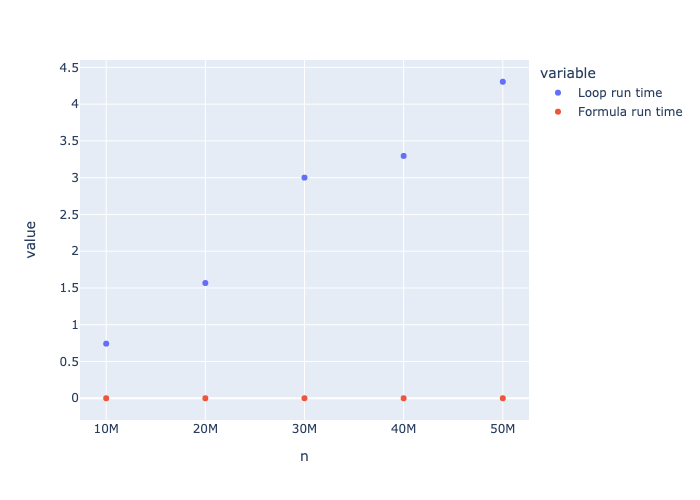

In [ ]:
import plotly.express as px

timing_results = { "n": [10000000,20000000,30000000,40000000,50000000],
                 "Loop run time" : [0.7423880100250244, 1.56697416305542, 3.0009987354278564, 3.2959609031677246, 4.3049681186676025],
                 "Formula run time" : [0.0000040531, 0.0000030994, 0.0000038147, 0.0000038147, 0.0000040531]
                 }

fig = px.scatter(timing_results,x="n",y=[ "Loop run time","Formula run time"])
fig.show()

Tangent: We could even automate this...

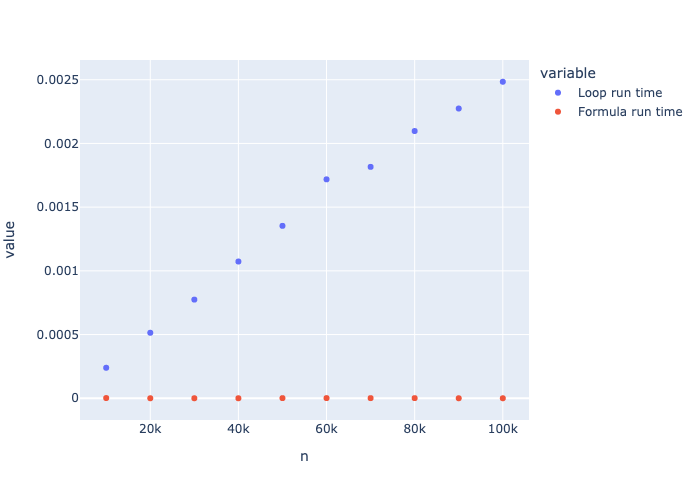

In [ ]:
import plotly.express as px


timing_results = { "n": [10000,20000,30000,40000,50000,60000,70000,80000,90000,100000],
                 "Loop run time" : [],
                 "Formula run time" : []
                 }

for n in timing_results["n"]:
    start = time.time()
    sum_of_n_loop(n)
    end = time.time()
    timing_results["Loop run time"].append(end-start)


    start = time.time()
    sum_of_n_formula(n)
    end = time.time()
    timing_results["Formula run time"].append(end-start)

fig = px.scatter(timing_results,x="n",y=[ "Loop run time","Formula run time"])
fig.show()

## $T(n)$ Time Analysis

Another way we can estimate running time is by counting up the number of basic operations/steps it takes to compute something.

$T(n)$ is the notation we use to describe the amount of time the algorithm takes for a problem of size $n$.

Let's try to apply this to our Sum of N algorithms.

In [ ]:
def sum_of_n_loop(n):
    total = 0  # 1 operation

    #this loop runs n+1 times
    for i in range(n+1): #2 operations (compute the next value in the range, then assign to i)
        total += i  #2 operations (first add, then assign value to total)

    return total

Outside the loop we have 1 operation

Every time through the loop, we have 4 operations

The loop runs $n+1$ times.

So, the total number of operations is $T(n) = 4(n+1)+1$ which after doing a little math is equivlent to $T(n) = 4n+5$

In [ ]:
def sum_of_n_formula(n):
    return n*(n+1)/2  #3 operations (add, then multiply, then divide)

In this case $T(n)=3$

Since $T(n)=3$ will always be less than $T(n) = 4n+5$, we know the formula version is better.

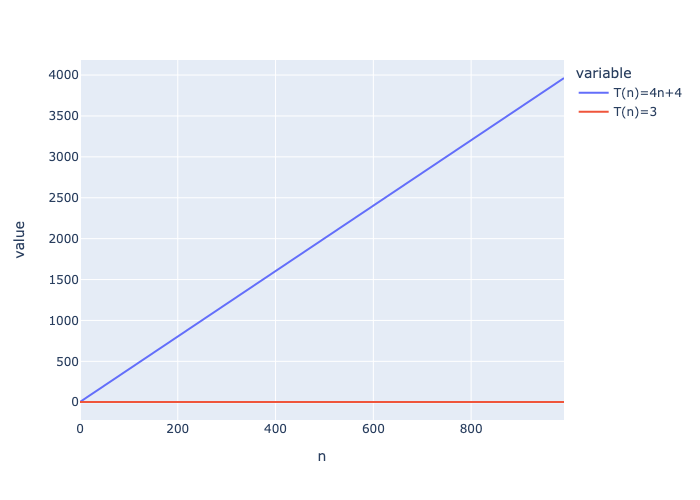

In [ ]:
import plotly.express as px

nvals = range(0,1000,10)
t1 = [4*n+4 for n in nvals]
t2 = [3 for n in nvals]

equation_plot = { "n": nvals,
                 "T(n)=4n+4" : t1,
                 "T(n)=3" : t2
                 }
fig = px.line(equation_plot,x="n",y=["T(n)=4n+4","T(n)=3"])
fig.show()

Even if we were comparing

$T(n) = 10000$

to

$T(n) = 4n+5$

We would probably still prefer $T(n) = 10000$ because it has _constant_ growth instead of _linear_ growth.

When the size of the problem gets really big, eventually the _linear_ algorithm will do worse.

The big-sized cases are usually the ones we care most about - what happens to your system when it is under heavier loads?

## Group Activity Problem 3

Order these $T(n)$ functions from slowest to fastest growing

$T(n) = 148n+12000$

$T(n) = 54$

$T(n) = 5n^2+33$

$T(n) = 1278540$

$T(n) = 2081n+6$

$T(n) = 23n^2+10n+8$



## Big-O: Order of magnitude

When looking at running time like $T(n) = 148n+12000$, the 12000 will be a bigger part of the overall number when $n$ is small, but when $n$ gets big, the $148n$ will dominate the 12000 part.

So, we don't really care much about the 12000.

Similarly, whene $n$ gets big, the 148 will become a lot less significant.

__Conclusion:__ When looking at $T(n)$, the specific constants are not very important!


#### Instead, look at $O($  $)$ - the Big-O

$O$ refers to the __order of magnitude__ - it's like $T(n)$, but you get to ignore all of the constants.

Big-O is the primary way we measure __computational complexity__.
* can be used for measuring _time_ complexity or _space_ (i.e., memory) complexity
* unless stated otherwise, assume it's talking about _time complexity_ - describing how the running time of an algorithm grows with larger inputs

All of these functions can be described as $O(n)$, also known as _linear_ because they grow linearly with $n$

* $T(n) = 148n+12000$

* $T(n) = 4n+5$

* $T(n) = 2081n+6$


These functions are all $O(n^2)$ - also known as _quadratic_

* $T(n) = 0.001n^2$
* $T(n) = 5n^2+33$
* $T(n) = 23n^2+10n+8$

Why doesn't $T(n) = 23n^2+10n+8$ have $O(n^2+n)$
* again, when $n$ gets big, the $n^2$ term is what dominates
* You only need to include the biggest term.

These functions are all $O(1)$ - also known as _constant_

* $T(n) = 3$
* $T(n) = 1278540$
* $T(n) = 54$

## Determining Big-O

Finding Big-O values is much easier than calculating $T(n)$ because you can ignore all the constants.

Here, we can see we have _constant_ * $n$ + _constant_ number of operations, which is just $O(n)$.

The only thing that depends on the _size of the input_ is the number of times the loop iterates.

In [ ]:
def sum_of_n_loop(n):
    total = 0  # constant number of things

    #this loop runs n + constant number times
    for i in range(n+1): #constant number of operations
        total += i  #constant number of operations

    return total

## Common Big-O functions



<table class="docutils align-default" id="id1">
<colgroup>
<col style="width: 50%;text-align:center"/>
<col style="width: 50%"/>
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p><strong>f(n)</strong></p></th>
<th class="head"><p><strong>Name</strong></p></th>
</tr>
</thead>
<tbody>
<tr class="row-even" style='text-align:center'><td><p><span class="math notranslate nohighlight">\(1\)</span></p></td>
<td><p>Constant</p></td>
</tr>
<tr class="row-odd"><td><p><span class="math notranslate nohighlight">\(\log n\)</span></p></td>
<td><p>Logarithmic</p></td>
</tr>
<tr class="row-even"><td><p><span class="math notranslate nohighlight">\(n\)</span></p></td>
<td><p>Linear</p></td>
</tr>
<tr class="row-odd"><td><p><span class="math notranslate nohighlight">\(n\log n\)</span></p></td>
<td><p>Log Linear</p></td>
</tr>
<tr class="row-even"><td><p><span class="math notranslate nohighlight">\(n^{2}\)</span></p></td>
<td><p>Quadratic</p></td>
</tr>
<tr class="row-odd"><td><p><span class="math notranslate nohighlight">\(n^{3}\)</span></p></td>
<td><p>Cubic</p></td>
</tr>
<tr class="row-even"><td><p><span class="math notranslate nohighlight">\(2^{n}\)</span></p></td>
<td><p>Exponential</p></td>
</tr>
</tbody>
</table>




<center>
<div>
<img src="attachment:bigoshapes.png" width="700"/>
</div>
</center>


## Group Activity Problem 4: Big-O of Searching

Here is an example of the `search_for()` function that we wrote during the first week of class.

In [ ]:
def search_for(item, list_to_search_in):
    """
    item: the item you're supposed to search for
    list_to_search_in: the list you're supposed to look through to find item
    return: True or False depending on if item is contained in list_to_search_in
    """
    for curr_item in list_to_search_in:
        if item == curr_item:
            return True

    return False

#let's test it on some examples
print( search_for(42,[35,66,70,5,42,10,12]) )
print( search_for(35,[35,66,70,5,42,10,12]) )
print( search_for(12,[35,66,70,5,42,10,12]) )
print( search_for(9,[35,66,70,5,42,10,12]) )

True
True
True
False


What is the $n$ in this algorithm? That is, what tells you the "size" of the input?

What is the Big-O of this algorithm?

Are the number of steps different for the different test cases?

What is the Big-O of the algorithm below?

In [ ]:
def search_for_alternate(item, list_to_search_in):
    """
    item: the item you're supposed to search for
    list_to_search_in: the list you're supposed to look through to find item
    return: True or False depending on if item is contained in list_to_search_in
    """
    return (item in list_to_search_in)

#let's test it on some examples
print( search_for_alternate(42,[35,66,70,5,42,10,12]) )
print( search_for_alternate(35,[35,66,70,5,42,10,12]) )
print( search_for_alternate(12,[35,66,70,5,42,10,12]) )
print( search_for_alternate(9,[35,66,70,5,42,10,12]) )

True
True
True
False


## Best, Average, and Worst Case

Different inputs (of the same size) to the same algorithm might result in different running times

__Best case__ performance: running time on the input that allows the algorithm to finish the fastest

__Worst case__ performance: running time on the input that requires the most time for the algorithm to finish

__Average case__ performance: average running time over typical inputs
* often it is difficult to determine what the _typical_ inputs are that should be considered

Unless otherwise stated, Big-O is assumed to be talking about _worst case performance_.

What are the best, worst, and average cases for `search_for()`?

## Group Activity Problem 5: Anagram Detection

An _anagram_ is a word or phrase that can be formed by rearranging the letters of a different word or phrase.

Examples of anagrams include

silent, listen

night, thing

the morse code, here come dots

eleven plus two, twelve plus one

__Problem:__ Write a function that will tell you if two strings are anagrams.

The book provides four different solutions in Section 3.4. Three of them are reproduced below.

Each group will be assigned one of these solutions. Do the following as a group.

1. Test the code on several inputs of different sizes.
2. Instrument the code to measure the time it takes on different-sized inputs.
3. Give examples of best, worst, and average case inputs.
4. Determine what the Big-O of the algorithm is, and be ready to explain why.

If you have time, you can check out what it says in the book, but try to analyze it without looking first!

## Solution 1: Checking off

This code works by converting the second string into a list and then search through the list for each character from the first string and replacing it with `None` when found.

For example, if given `"silent"` and `"listen"`, the list would start out as

`['l','i','s','t','e','n']`

when searching for `'s'`, it becomes `['l','i',None,'t','e','n']`

when searching for `'i'`, it becomes `['l',None,None,'t','e','n']`

... and so until the list becomes `[None,None,None,None,None,None]`

In [ ]:
def anagramSolution1(s1,s2):
    stillOK = True
    if len(s1) != len(s2):
        stillOK = False

    alist = list(s2)
    pos1 = 0

    while pos1 < len(s1) and stillOK:
        pos2 = 0
        found = False
        while pos2 < len(alist) and not found:
            if s1[pos1] == alist[pos2]:
                found = True
            else:
                pos2 = pos2 + 1

        if found:
            alist[pos2] = None
        else:
            stillOK = False

        pos1 = pos1 + 1

        #uncomment this if you want to see what the list looks like at each step
        #print(alist)

    return stillOK

print(anagramSolution1('silent','listen'))

True


## Solution 2: Sort and Compare

This solution starts by converting both strings to lists and then sorting them. Once in sorted order, it goes through and checks that each corresponding item in the list is the same.

For example, if given `"silent"` and `"listen"`, it would turn them into lists `['s', 'i', 'l', 'e', 'n', 't']` and `['l', 'i', 's', 't', 'e', 'n']`.

Then, after sorting each list, we get `['e', 'i', 'l', 'n', 's', 't']` and `['e', 'i', 'l', 'n', 's', 't']`.

We then compare `e` to `e`, then `i` to `i`, then `l` to `l` and so on. If we ever find two that don't match, we know it isn't an anagram. If we get to the end and they all match, it is an anagram.

In [ ]:
def anagramSolution2(s1,s2):
    alist1 = list(s1)
    alist2 = list(s2)

    alist1.sort()
    alist2.sort()

    #uncomment these if you want to see the sorted lists
    #print(alist1)
    #print(alist2)

    pos = 0
    matches = True

    while pos < len(s1) and matches:
        if alist1[pos]==alist2[pos]:
            pos = pos + 1
        else:
            matches = False

    return matches

print(anagramSolution2('silent','listen'))

True


## Solution 4: Count and Compare

This solution creates a list of letter frequencies for each string. Since there aree 26 letters in the alphabet, the strings will each have 26 entries - the first entry is the number of occurrences of `'a'`, the secondd is the number of occurrences of `'b'`, and so on.

We can then loop through these frequency lists and compare them item by item to see if they're the same.

For example, given inputs `'elevenplustwo'` and `'twelveplusone'`, you end up with the frequency lists

`[0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]`

and
`[0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]`

looping through this list entry by entry will show that they are the same.

On the other hand, if given inputs `'granma'` and `'anagram'`, you'd get the frequency lists

`[2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]`

`[3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]`

And you can determine they are not anagrams, because the first list has a 2 in the `a` position while the second one has a `3`.

In [ ]:
def anagramSolution4(s1,s2):
    c1 = [0]*26
    c2 = [0]*26

    for i in range(len(s1)):
        pos = ord(s1[i])-ord('a')
        c1[pos] = c1[pos] + 1

    for i in range(len(s2)):
        pos = ord(s2[i])-ord('a')
        c2[pos] = c2[pos] + 1

    #uncomment these if you want to see the word frequency lists
    #print(c1)
    #print(c2)

    j = 0
    stillOK = True
    while j<26 and stillOK:
        if c1[j]==c2[j]:
            j = j + 1
        else:
            stillOK = False

    return stillOK

print(anagramSolution4('elevenplustwo','twelveplusone'))

True
